# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [4]:
# understanding data set
df.describe()


,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [5]:
# using shape for retreiving rows and columns
df.shape

(1898, 9)

#### Observations:
Data set contains 1898 rows and 9 columns in the data. The rows account for all the orders processed

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [6]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: The data frame has 1898 rows and 9 columns.The rows account for all the orders processed and The rows account for all the orders processed
Data has \
1)one float data type \
2)four integers \
3)four objects \
rating column should be in integer.\
order_id and customer_id are categorical variables with numerical labels

In [7]:
# Before changing type to integer of rating. First verify what values does rating has
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

#### Before Changing type to numeric ,we can reassign the 'Not given' rating the number zero number. This will enable us to convert the rating column to a numeric data type without compromising the observations

In [8]:
# Replace the not given value to 0
df['rating'] = df['rating'].replace(['Not given'],0)

# ..Then Change the data types accordingly

df = df.astype({"rating": float, "order_id": object, "customer_id": object})

#...Then confirm the data type has changed accordingly

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   object 
 1   customer_id            1898 non-null   object 
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 133.6+ KB


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [9]:
# Write your code here
# Use isnull here to check missing data
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:/ 
We do not have any null values in the data frame, hence it requires no treatment, however we note that we did not have reviews for all the orders, for which we replaced the 'Not given' with 0


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [10]:
# Write your code here
df.describe()

,cost_of_the_order,rating,food_preparation_time,delivery_time
count,1898.000000,1898.000000,1898.000000,1898.000000
mean,16.498851,2.659642,27.371970,24.161749
std,7.483812,2.195280,4.632481,4.972637
min,4.470000,0.000000,20.000000,15.000000
25%,12.080000,0.000000,23.000000,20.000000
50%,14.140000,4.000000,27.000000,25.000000
75%,22.297500,5.000000,31.000000,28.000000
max,35.410000,5.000000,35.000000,33.000000


#### Observations:
 We have 1898 observations
 1. 25% of the observations cost 12.08 and below  have no rating and take about 23 minutes and below to prepare and 20 mins or below to deliver
 2. 50% have values below 14.14, 4,27, and 25 for the cost, rating, preparation time, & delivery time
 3. 75% we have values below 22.29,5, 31, & 28 with the max observations being 35.41, 5, 35 and 33 for the cost, rating, preparation time, & delivery time
 ###### Delivery Time 
 4. The average delivery time is approximately 24.16 minutes\
Delivery times have a standard deviation of about 4.97, suggesting variability\
The quickest delivery took 15 minutes, while the longest took 33 minutes\
 It takes Minimum of 20 minutes, an average of 27.37 minutes and a maximum of 35 mins to prepare the food 
 ##### The data indicates a diverse range of order costs, with a relatively low average rating. The food preparation and delivery times also show variability, with some orders being completed more quickly than others. 

### **Question 5:** How many orders are not rated? [1 mark]

In [11]:
# Write the code here
#in earlier code we assigned value nogiven to 0
#.value_counts(): This is a pandas function that calculates the frequency of each unique value in the specified Series
df['rating'].value_counts(dropna=False)

0.0    736
5.0    588
4.0    386
3.0    188
Name: rating, dtype: int64

#### Observations:
in earlier code we assigned value nogiven to 0\
 Not rated total orders count is 736


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

#### this question we are going to observe the distribution for numerical columns.
1. Cost of orders
2. Rating for rated (3,4,5 values)
3  Order count per cuisine
4. observations for weekday and weekend
5. observations for a. preparation time and food delivery time

##### ------Lets understand COST of order----------------------------------------

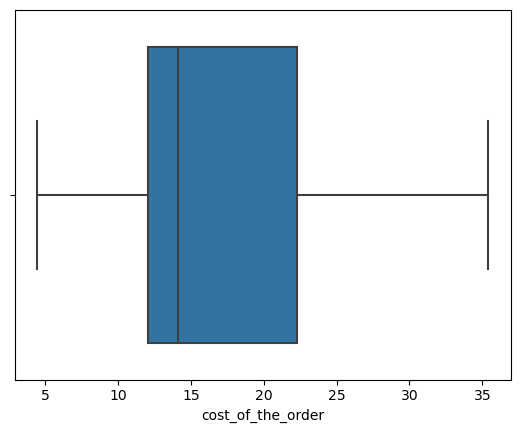

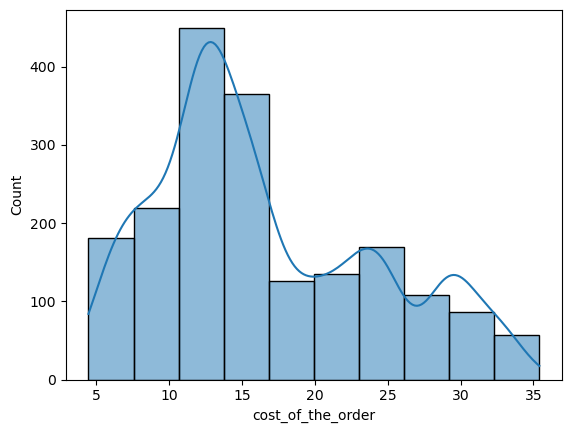

In [12]:
# Write the code here
# 1. checking boxplot of Seaborn library
sns.boxplot(data = df, x='cost_of_the_order')
plt.show();
sns.histplot(data = df, x='cost_of_the_order',bins = 10, stat = 'count',kde=True)
plt.show()

##### --------------Observations-----------------------
1.The histplot displays a left skew, indicating a preference for lower costs, though there is a minor peak near in between 10-15 dollars \
2.The boxplot reveals a median cost of approximately $14, with a right skew in the order distribution, suggesting a wider range of higher costs.


##### ------Lets understand rating----------------------------------------

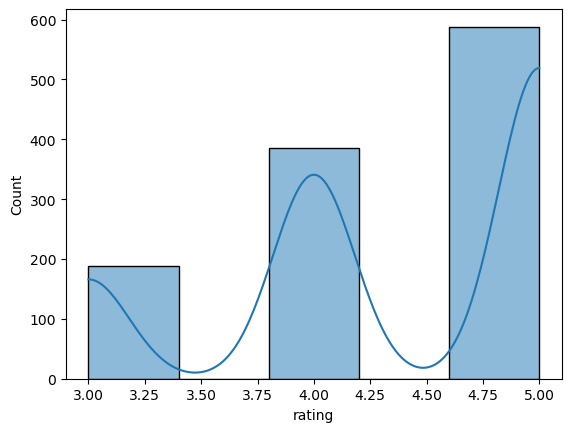

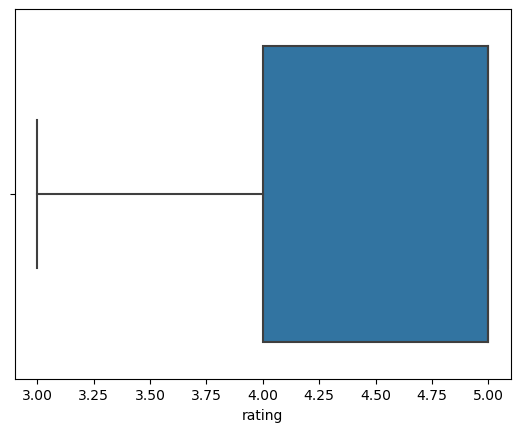

In [13]:
df_rating_modified = df[df['rating']!= 0]
sns.histplot(data = df_rating_modified, x='rating',bins = 5,stat = 'count',kde = True)
plt.show()
sns.boxplot(data = df_rating_modified, x='rating')
plt.show();

##### ..........Observations for rating......................
1.Regarding rated orders, it's important to note that approximately 38.77% of orders are unrated.\
2.When examining the distribution of ratings, the histplot indicates a concentration of ratings around the maximum value.\
3.However, the boxplot displays a significant left skew, resulting in the absence of a right whisker in the plot.

##### ------Lets understand Cuisine order count ---------------------------------------

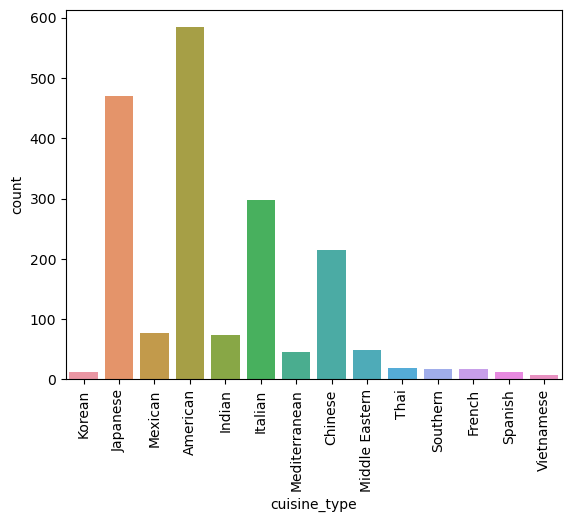

In [14]:
# Order count per Cuisine
sns.countplot(data=df,x='cuisine_type')
plt.xticks(rotation=90)
plt.show()

####..........Observations for order count ......................
1. Top cuisine American close to 600
2. japanese ,italian and chinese take second, thrid and fouth places
3. Indian and mexican both are close to 100
4. Follwed by mediterranean and middle eastern
5. last place is vietnamese

##### ................Lets understand which day is higher activity .....................

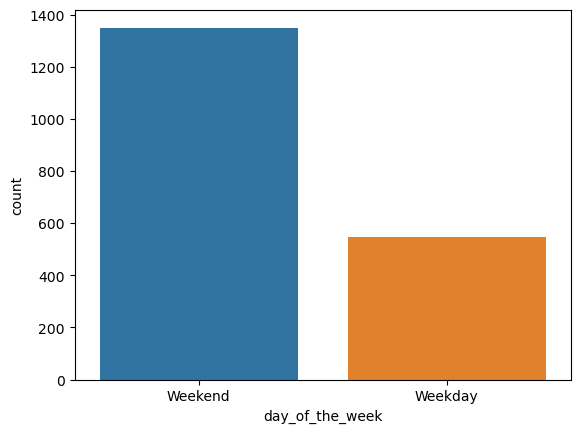

In [15]:
sns.countplot(data=df,x='day_of_the_week')
plt.show()

#### ........Observations which day is higher activity
1. Weekend has higher activity with close to 1400 orders
2. weekday has close to 600 orders

#### ....... Lets understand food preparations time

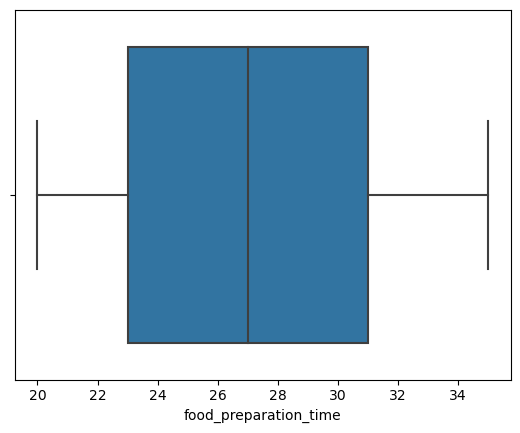

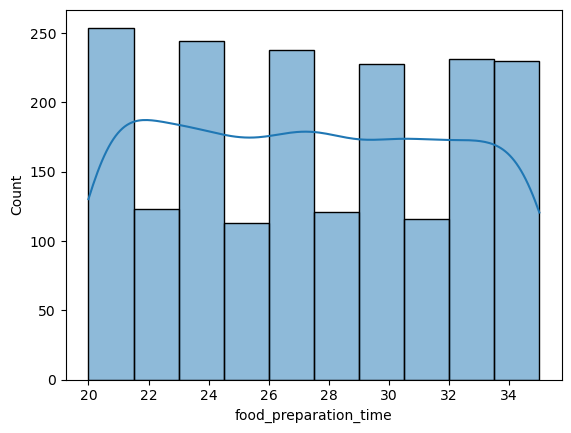

In [16]:
sns.boxplot(data = df, x='food_preparation_time')
plt.show();
sns.histplot(data = df, x='food_preparation_time',bins = 10, stat = 'count',kde = True)
plt.show()

#### .........Observations on food preparation time
1. Even distribution - takes about 20-36 mins
2. median of about 27 mins

#### ....... Lets understand food delivery time

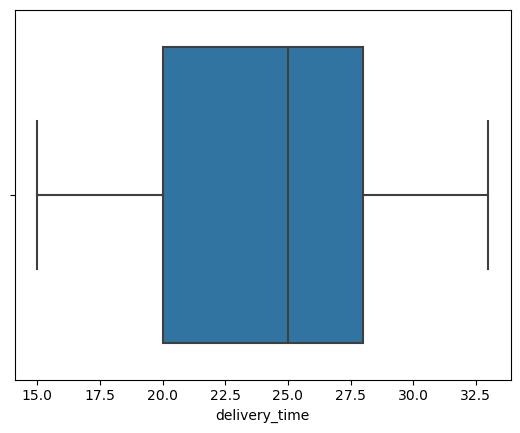

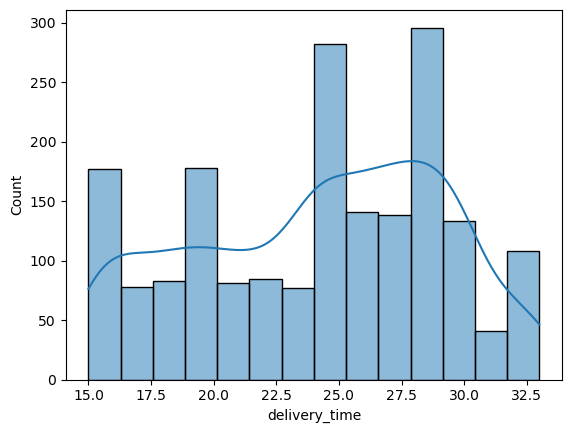

In [17]:

sns.boxplot(data = df, x='delivery_time')
plt.show();
sns.histplot(data = df, x='delivery_time', stat = 'count',kde = True,)
plt.show()

#### ....... Observations for delivery time time
The median delivery time is about 25 minutes with the observations being skewed to the left. From the histplot we can determine that most orders take between 25 and 28 minutes to be delivered.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [18]:
# Write the code here
# grouping the DataFrame based on the 'Restaurant Names' column.
#  proceeds to count the number of orders for each restaurant within the DataFrame.
# After obtaining these counts, then we need to arrange them in descending order, which means it places the restaurants with the highest number of orders at the top.
df[['restaurant_name','order_id']].groupby('restaurant_name').count().sort_values(by = 'order_id',axis = 0, ascending=False).head(5)
# we used head to display first 5 resturants

,order_id
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:\
1.Shake Shack is in first place with 219 orders\
2.The Meatball Shop, Blue Ribbon Sushi with 132 and 119\
3.Blue Ribbon Fried Chicken & Parm with 96 & 68 orders 


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [19]:
# Write the code here
# in simarway to question -8 , we filiter observations for weekend and group by cuisine type 
df_cuisin = df[df['day_of_the_week'] =='Weekend'].groupby('cuisine_type').count().sort_values(by = 'order_id',axis = 0, ascending=False)
df_cuisin.head(5)

,order_id,customer_id,restaurant_name,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
cuisine_type,,,,,,,,
American,415,415,415,415,415,415,415,415
Japanese,335,335,335,335,335,335,335,335
Italian,207,207,207,207,207,207,207,207
Chinese,163,163,163,163,163,163,163,163
Mexican,53,53,53,53,53,53,53,53


#### Observations:
1. Most ordered  is American Cuisine Type with a count of 415 orders\
2. Followed by Japanese with 335\
3. Followed by italian and chinese with 207 and 163\
4. Fith place to mexican with 53 orders

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [20]:
# Write the code here
# Do a count of total orders
total_orders = df['cost_of_the_order'].count()
# Do a count of orders with cost above $20
orders_above20 = df['cost_of_the_order'][df['cost_of_the_order']> 20].count()
# Compute the percent of the orders above $20
percentage_above20 = round((orders_above20/total_orders)*100,2) # Rounded to two decimal places
percentage_above20
# to find out percentage we did orders above 20 to total number of orders 

29.24

#### Observations:
1. 29.24 % ordera cost more than 20 dollars

### **Question 10**: What is the mean order delivery time? [1 mark]

#### two ways to find out mean of order delivery
1. we can use describe 
2. We can calculate it

In [21]:
# Option-1
df.describe()

,cost_of_the_order,rating,food_preparation_time,delivery_time
count,1898.000000,1898.000000,1898.000000,1898.000000
mean,16.498851,2.659642,27.371970,24.161749
std,7.483812,2.195280,4.632481,4.972637
min,4.470000,0.000000,20.000000,15.000000
25%,12.080000,0.000000,23.000000,20.000000
50%,14.140000,4.000000,27.000000,25.000000
75%,22.297500,5.000000,31.000000,28.000000
max,35.410000,5.000000,35.000000,33.000000


In [22]:
#Option -2
Mean_del_time = round(df[['delivery_time']].agg('mean'),2) # Rounded to two decimal places
Mean_del_time

delivery_time    24.16
dtype: float64

#### Observations: 
On average it takes 24.16 minutes to have the prepared orders delivered

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [23]:
# Write the code here
#Initially, select and retains only the columns that are of interest.
#Following this, group the resulting DataFrame by 'Customer ID' and calculates the count of orders for each customer.
#The output is then sorted in descending order, with customers having the highest order counts appearing first
df[['order_id','customer_id']].groupby('customer_id').count().sort_values(by = 'order_id',axis = 0, ascending=False).head(10)

,order_id
customer_id,
52832,13
47440,10
83287,9
250494,8
65009,7
82041,7
259341,7
276192,7
60052,6


#### Observations:
1.After extracting the top 10 most frequent customers, it becomes apparent that there is a tie among four clients, all of whom have the same 5th highest order count.\
2.To address this situation, the company may need to consider alternative criteria, such as the total amount spent by these customers or another relevant parameter, to break the tie or make decisions regarding these multiple customers with the same qualifying score.\
3.Alternatively, if no tie-breaking criteria are available, the company should plan to reward a total of 8 customers instead of the initially intended 5, considering the tied customers in the reward allocation

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


##### We perform multivariant analysis to examine the relationship between two variables. In essence, it involves the simultaneous analysis of two different variables to understand how they are related, or to identify patterns . This includes scatter plots, correlation coefficients, Cross-tabulations (contingency tables), chi-squared tests

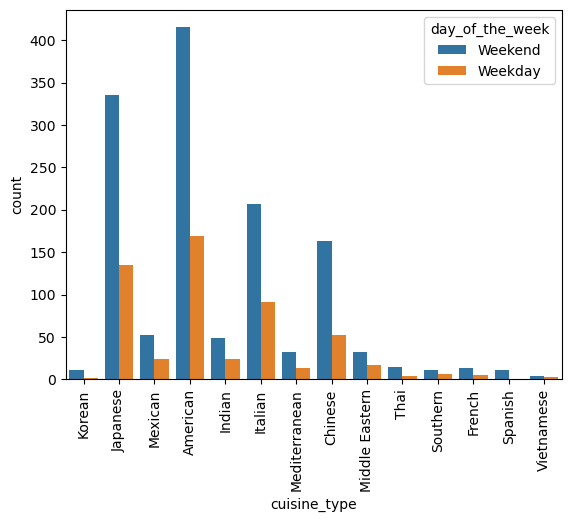

In [24]:
sns.countplot(data=df,x='cuisine_type',hue= 'day_of_the_week')
plt.xticks(rotation=90)
plt.show()

#### ---------------Observations------------------------------ 
1. This plot is for Orders per cuisine per day of the week\
2. popularity of cusine is consistent irrespective of any day\
3. The demand is generally low during the weekdays say Japnese weekend close to 350 but weekday it is close to 150

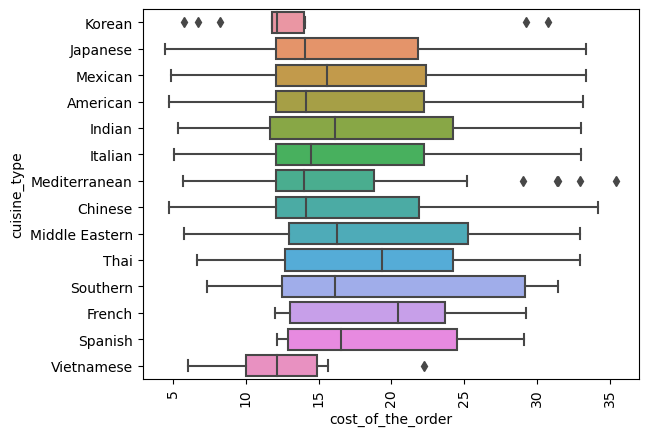

In [25]:
sns.boxplot(data=df,x='cost_of_the_order',y='cuisine_type')
plt.xticks(rotation=90)
plt.show();

#### ---------------Observations--------------------
1. this plot is  the Spread Cost of Order\
2. Most cuisines have varying degrees of skewed costs with a few having outliers such as Korean, Mediterranean and Vietnamese

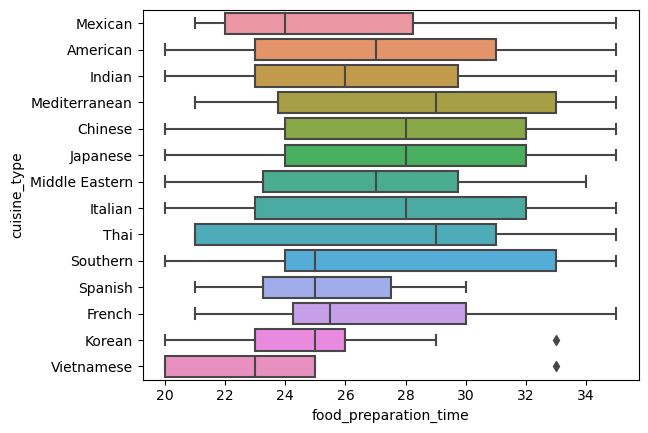

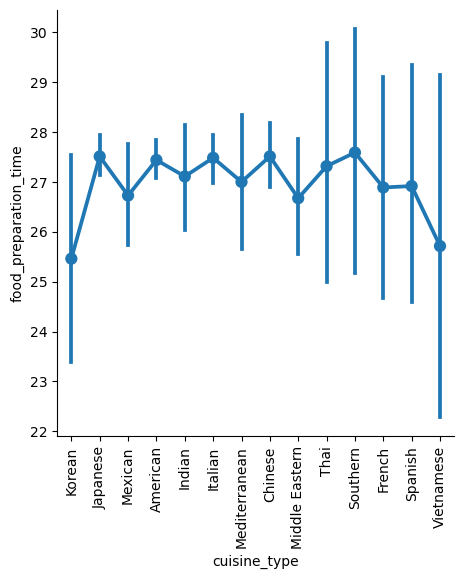

In [26]:
sns.boxplot(data=df_rating_modified,x='food_preparation_time',y='cuisine_type')
plt.show()
sns.catplot(data = df, x = 'cuisine_type',y = 'food_preparation_time',kind = 'point')
plt.xticks(rotation=90)
plt.show();

#### --------Observations---------------------
1. Some have large spread of 95% values within which we can reasonably expect a population parameter\
2. Most cuisine types have more or less the same average preparation time 

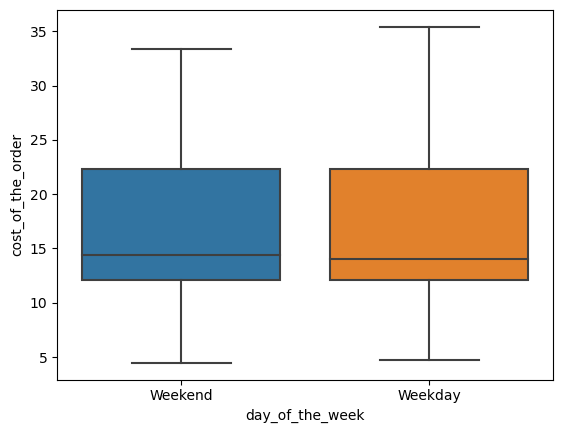

In [27]:
sns.boxplot(data=df,x='day_of_the_week',y='cost_of_the_order') 
plt.show()


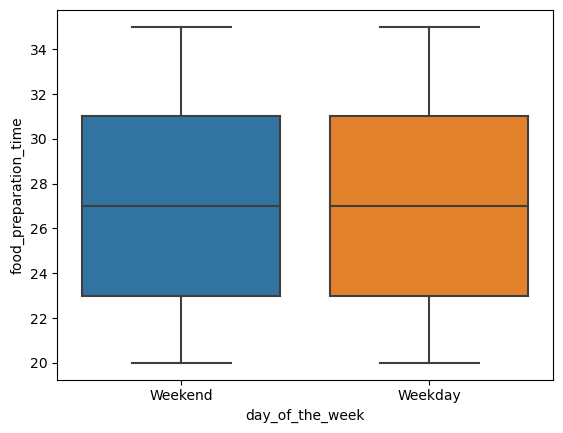

In [28]:
sns.boxplot(data=df,x='day_of_the_week',y='food_preparation_time') 
plt.show()


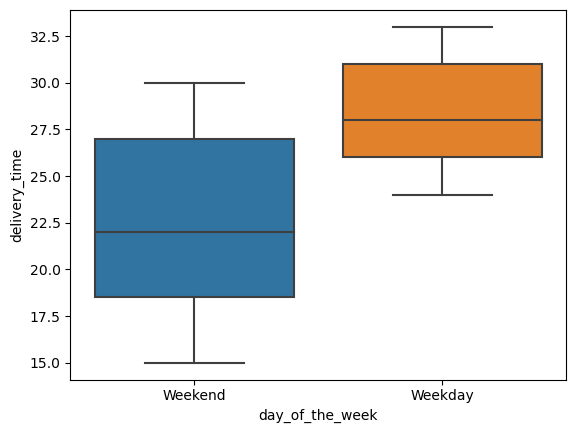

In [29]:
sns.boxplot(data=df,x='day_of_the_week',y='delivery_time') 
plt.show()

#### -----------------Observations-------------------
1. This is for  Day of the week against the other variables:\
2. Across all days of the week, there is a consistent distribution of observations, suggesting that certain factors don't significantly vary by day.\
3. However, there's an exception when it comes to delivery time, where weekdays tend to have longer delivery times compared to weekends.\
4. Specifically, the median delivery time on weekends is approximately 22.5 minutes, while on weekdays, it is approximately 28.5 minutes.

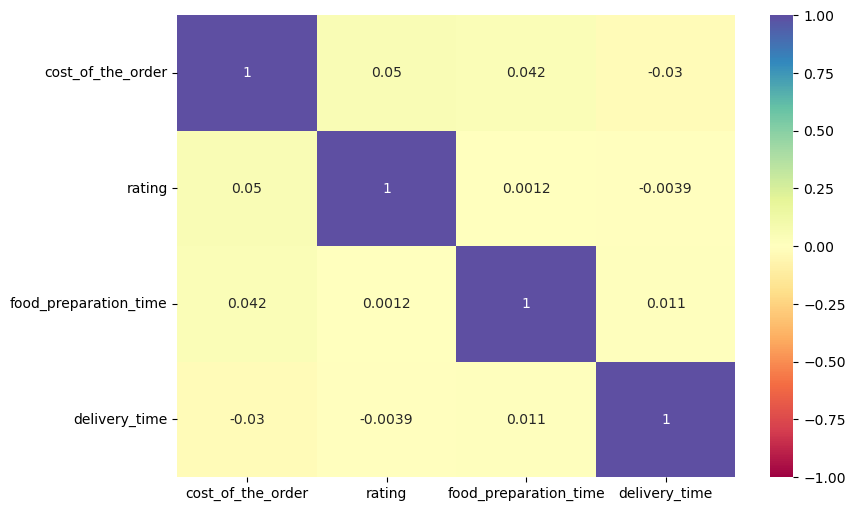

In [30]:
plt.figure(figsize=(9,6))
#sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Spectral', vmin=-1, vmax=1)
plt.show()

##### Observations on the heatmap and pairplot:
This shows very week correlation between variables

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

#### The goal is to identify restaurants that meet specific criteria for a promotional offer in their advertisements.
1. Two criteria must be satisfied for a restaurant to qualify for the offer\
2. The restaurant should have a rating count of more than 50.\
3. The average rating of the restaurant (calculated from rated orders) should be greater than 4.\
Now lets identifies and presents a list of restaurants that meet the company's criteria for a promotional offer based on ratings and rating counts.

In [31]:
#1. Create a data set of Restaurants with a consideration of mean rating greater than 4. The rating eliminates all unrated rows in calculating the mean
df_resturant_greater4 = df[['restaurant_name','rating']][df['rating']!= 0].groupby('restaurant_name').mean()> 4 

#2. Create a data set of Restaurants with a consideration of count of rating greate than 50.Equally in this case unrated orders are not considered.
df_restaurant_ratingcount= df[['restaurant_name','rating']][df['rating']!= 0].groupby('restaurant_name').count()> 50

#3.Now reset index for both to ensure consistent indexing when merging with other DataFrames.
df_resturant_greater4.reset_index(inplace=True)
df_restaurant_ratingcount.reset_index(inplace=True)
# 4.Now Create a set of Restaurants that meet both conditions using merge
Eligible_Resturants = pd.merge(df_restaurant_ratingcount[df_restaurant_ratingcount['rating']== True], df_resturant_greater4[df_resturant_greater4['rating']== True],on ='restaurant_name')
# Return the set of qualified restaurants only
Eligible_Resturants

,restaurant_name,rating_x,rating_y
0,Blue Ribbon Fried Chicken,True,True
1,Blue Ribbon Sushi,True,True
2,Shake Shack,True,True
3,The Meatball Shop,True,True


#### Observations:
1. Four resturants are quilified as they are satisfyingboth conditions\
2. Blue Ribbon Fried Chicken,Blue Ribbon Sushi, Shake Shack and The Meatball Shop

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

#### our goal is to calculate the net revenue generated by the company based on the commissions charged for orders of different cost levels.
##### Two commission rates are applied:
1. For orders with a cost greater than dollar 20, a 25 percentage commission rate is applied.\
2. For orders with a cost between dollar 5 and dollar 20 (inclusive), a 15 percentage commission rate is applied.\
3. Orders with a cost of dollar 5 or less do not incur any commission.

In [32]:
# lets intialize variables income and Revenue. we intialize to zero
Company_Income = 0
Company_Revenue = 0

#lets create a series for orders
Series_cost = pd.Series(df['cost_of_the_order'])

# lets calculate the individual income and company revenue
for i in range(len(Series_cost)):
    if (Series_cost[i] > 5) & (Series_cost[i] < 20):
        Company_Income = Series_cost[i]*0.15
    elif (Series_cost[i] > 20):
        Company_Income = Series_cost[i]*0.25
    else:
        Company_Income = 0
    Company_Revenue = Company_Revenue + Company_Income
    
 

In [33]:
# net revenue generated value is 
Company_Revenue

6166.302999999994

#### Observations:
net revenue generated by the company across all orders is 6166.302999999994

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

#### Goal is  to analyze the total time it takes to deliver food, considering both food preparation time and delivery time. The percentage of orders that take more than 60 minutes from the time the order is placed.

In [34]:
# we create a new column in dataframe named 'total_time' required to deliver each order

df['total_time'] = df['food_preparation_time']+df['delivery_time']

# display whether it created column
df

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,0.0,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,0.0,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24,49
...,...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5.0,31,17,48
1894,1477421,397537,The Smile,American,12.18,Weekend,5.0,31,19,50
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,0.0,31,24,55
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5.0,23,31,54


In [35]:
#calculate the percentage of orders that take more than 60 minutes to be delivered from the time the order is placed. This calculation is based on the 'total_time' column, which represents the total time required for each order.
total_observations = df['total_time'].count()
ordertime_greater60 = df['total_time'][df['total_time']> 60].count()

Percentage_orders_above60 = round((ordertime_greater60/total_observations)*100,2)
Percentage_orders_above60

10.54

#### Observations:
percentage of orders that take more than 60 minutes = 1054 percentage

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

####  Goal is to analyze the mean delivery time of orders and other related statistics, considering the day of the week as a factor and understand how the mean delivery time varies during weekdays and weekends.
For this we groupby day of the week and agregate delivery time

In [36]:
#groupby day of the week and agregate delivery time
Avg_deliverytime = df.groupby('day_of_the_week')[['delivery_time']].agg(['mean','sum','count','std'])
Avg_deliverytime

delivery_time                       
                         mean    sum count       std
day_of_the_week                                     
Weekday             28.340037  15502   547  2.891428
Weekend             22.470022  30357  1351  4.628938

#### Observations:
1. The mean delivery time during the weekend is notably shorter at approximately 22.47 minutes, while the mean delivery time on weekdays is longer at approximately 28.34 minutes.\

2. This observation is interesting because it suggests a difference in delivery times between weekdays and weekends.\

3. When reviewing the order count, it becomes apparent that there are fewer orders on weekdays compared to weekends.\

4. difference in mean delivery times is the potential impact of higher traffic or demand during weekdays.\

5. Higher weekday traffic or demand may lead to longer delivery times as restaurants and delivery services cope with increased orders, potentially resulting in delays.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
#### Below are conclusions drawn considering rating concentration,cost of orders, Cuisine popularity preparation and delivery time and reward criteria
*  The ratings are concentrated around the high score of 5, suggesting that mostly very satisfied customers rate the service. However, approximately 38% of orders are unrated, and it's essential to consider whether these unrated orders might skew the overall rating in a different direction.
*  The cost of orders exhibits a bimodal distribution, with a peak around dollar 13 and a slight peak around dollar 25. This suggests the possibility of two distinct market segments: one with a focus on affordability (possibly students) and another with a willingness to spend more (likely affluent professionals).
*  There is a consistent popularity of cuisines irrespective of the day of the week, although demand is significantly higher on weekends. This indicates that marketing efforts can be focused on weekdays to boost sales further.
*  Preparation time is relatively consistent compared to delivery time. Delivery time appears to be the significant variable affecting the total preparation time. Investigating the factors contributing to longer delivery times is essential to improve overall service.
*  There is a tie among four customers for the 5th position in the proposed reward criteria. This situation requires further analysis or a decision on how to handle such ties, either by rewarding all or introducing tie-breakers based on other criteria.

### Recommendations:
#### recommendations with focus on cusinie type and feedback ratings are below. Incorporating cuisine-specific feedback and ratings into the business strategy can lead to more effective improvements and targeted marketing efforts, ultimately enhancing customer satisfaction and increasing revenue.
*  <strong> Encourage customer ratings </strong> : Encourage customers to rate their orders and provide feedback on the cuisine quality and overall experience. Implement incentives or follow-up mechanisms to gather valuable feedback from all customers.
*  <strong> Cuisine-Specific Improvement </strong> : Analyze feedback ratings for each cuisine type to identify areas for improvement. Focus on enhancing the quality and service of cuisines with lower ratings. Consider introducing promotions or discounts for well-rated cuisines to boost sales
*  <strong> Segmented Marketing </strong> : Tailor marketing strategies to different cuisine types based on their popularity and customer feedback. Highlight highly-rated cuisines like American, japanese ,Italian and Chinese in promotions and advertisements to attract more customers.
*  <strong> Weekday Promotion of Cuisines </strong> :Leverage the consistent popularity of certain cuisines across days of the week. Implement weekday-specific promotions for cuisines that perform well during weekdays. Consider offering discounts or special deals to encourage weekday orders.
*  <strong> Review Delivery Time by Cuisine </strong> :Examine the delivery time for each cuisine type to identify potential bottlenecks or issues. Work closely with restaurants to optimize preparation and delivery processes, especially for cuisines with longer delivery times
*  <strong> Customer Engagement for Low Ratings </strong> :Reach out to customers who provide low ratings to gather specific feedback on their experience. Address their concerns and take corrective actions to improve service quality
*  <strong> Segmented Tie-Breakers for Promotions </strong>: When customers have the same score in promotional offers, consider segmenting tie-breaker criteria based on cuisine type. For example, prioritize customers who have consistently ordered from a specific cuisine with high ratings
*  <strong> Cuisine Demographics Analysis </strong> : Conduct a demographic analysis to understand the customer profile for each cuisine type. Identify trends and preferences among different customer segments to tailor marketing and menu offerings accordingly

---